## Importing libraries

In [35]:
import pandas as pd
import numpy as np
import os
from copy import copy
import seaborn as sb
import matplotlib.pyplot as plt
import torch

## setting up expriment related variables

#### column names

In [2]:
columns = ["algo", "experiment_id", "dataset", "seed", "generation", "training_fitness", "timing", "pop_node_count"]

## defining helping functions

In [15]:
def get_column_names(log_level = 1, base_cols = columns):
    
    base_cols = copy(base_cols)
    
    log_level = int(log_level)

    if log_level == 1:
        base_cols.append("test_fitness", "log_level")
    
    elif log_level == 2:
        
        base_cols.extend(["test_fitness","genotypic_diversity", "phenotipic_diversity", "log_level"])
    elif log_level == 3:
        base_cols.extend(["test_fitness","pop_nodes", "pop_fitnesses", "log_level"])
    else:
        base_cols.extend(["test_fitness","genotypic_diversity", "phenotipic_diversity","pop_nodes", "pop_fitnesses",
                         "log_level"])

    return base_cols

In [16]:
def get_experiment_results(experiment_id=None, logger_name="logger_checking.csv", base_cols = columns, experiment_id_index=1):
    
    # getting the path to the logger file
    logger = os.path.join(os.getcwd().split("utils")[0], "main" ,"log", logger_name)
    
    # seeing what the maximum number of columns in the logger is, as to avoid different logger level errors:
    with open(os.path.join(os.getcwd().split("utils")[0], "main" ,"log", "logger_checking.csv"), 'r') as temp_f:
        # Read the lines
        lines = temp_f.readlines()

        use_cols = max([len(line.split(",")) for line in lines])

    # loading logger data into a pandas dataframe
    results = pd.read_csv(logger, header = None , index_col=None, names=range(use_cols))
    
    # getting the experiment id of the last row in the logger data, if -1 is given as the experiment id
    if experiment_id == -1:
        
        # getting the experiment id of the last experiment
        experiment_id = results[experiment_id_index].iloc[-1]
        
        # filtering the results to only contain the required experiment_id
        results = results[results[experiment_id_index] == experiment_id].dropna(axis=1)
    
    # if a specific expriment id was given
    elif isinstance(experiment_id, str):
        results = results[results[experiment_id_index] == experiment_id].dropna(axis=1)
    
    # if a list of experiment_ids was given
    elif isinstance(experiment_id, list):
        
        # filtering the results to only contain the required experiment_ids
        results = results[results[experiment_id_index].isin(experiment_id)].dropna(axis=1)
    
    # if experiment_id is none, return the entire logger dataset
    else:
        
        # getting the column names from the inffered log level:
        colnames = get_column_names(log_level=results.iloc[-1].iloc[-1], base_cols=base_cols)

        results.columns = colnames
        
        # returning the results
        return results.drop(columns=["log_level"])
    
    # getting the column names from the inffered log level:
    colnames = get_column_names(log_level=results.iloc[-1].iloc[-1], base_cols=base_cols)

    results.columns = colnames
    
    # returning the results
    return results.drop(columns=["log_level"])

In [8]:
def show_results(x_var, y_var = "generation", experiment_id = -1, logger_name="logger_checking.csv", colnames=columns, log_level=2, dataset=None):
    
    # getting the results dataframe
    df = get_experiment_results(experiment_id=experiment_id, logger_name=logger_name)
    
    # obtaining the results only for the specific dataset
    if dataset is not None:
        plotting = df[df["dataset"] == dataset]
        
    # performing a groupby on the variables of interest
        plotting = pd.DataFrame(plotting.groupby([x_var, "algo"])[y_var].median())

        sb.lineplot(data=plotting, x = x_var, y=y_var, hue = "algo")
        plt.xlabel(x_var)
        plt.ylabel(y_var)
        plt.title(f'{dataset.capitalize()}')
        plt.show()

    else:
        for ds in df.dataset.unique():
            # keeping only one dataset at a time
            plotting = df[df["dataset"] == ds]
            
            # performing a groupby on the variables of interest
            plotting = pd.DataFrame(plotting.groupby([x_var, "algo"])[y_var].median())
            
            sb.lineplot(data=plotting, x = x_var, y=y_var, hue = "algo")
            plt.xlabel(x_var)
            plt.ylabel(y_var)
            plt.title(f'{ds.capitalize()}')
            plt.show()
        

In [21]:
df = get_experiment_results(experiment_id="ffa81581-e21d-11ee-9d0c-049226d138fa", logger_name="logger_checking.csv")


In [37]:
df["pop_fitnesses"]

1971    tensor(71.8188) tensor(72.4896) tensor(71.7204...
1972    tensor(59.9239) tensor(72.2352) tensor(71.9489...
1973    tensor(58.5338) tensor(71.6509) tensor(71.6334...
1974    tensor(58.5338) tensor(60.8217) tensor(59.9157...
1975    tensor(58.5338) tensor(71.7714) tensor(72.5095...
                              ...                        
2774    tensor(2289.7627) tensor(2292.9941) tensor(229...
2775    tensor(2289.7627) tensor(2294.9114) tensor(229...
2776    tensor(2289.7361) tensor(2293.4536) tensor(229...
2777    tensor(2289.4502) tensor(2289.7361) tensor(229...
2778    tensor(2288.4495) tensor(2290.1333) tensor(229...
Name: pop_fitnesses, Length: 808, dtype: object

In [40]:
df["pop_fitnesses"].map(lambda x: torch.tensor([float(val.split("tensor(")[-1][:-1]) for val in x.split()])).iloc[1]

tensor([59.9239, 72.2352, 71.9489, 72.8029, 72.5312, 71.7785, 66.9630, 70.6068,
        72.3893, 71.9770, 71.5347, 71.2146, 71.4655, 72.0417, 61.4157, 73.0466,
        72.3875, 71.5831, 79.9889, 70.8625, 72.2619, 73.3321, 71.7238, 71.0664,
        69.6244, 71.5601, 71.4279, 72.5973, 71.6487, 72.3322, 71.6449, 71.6609,
        70.3390, 72.6196, 65.8242, 71.9139, 71.8740, 71.4143, 71.2997, 72.3450,
        72.0860, 72.2553, 72.1802, 70.4455, 72.2214, 72.7076, 72.7540, 65.9390,
        66.7721, 62.2337, 72.1477, 72.9757, 72.1922, 71.6403, 71.5575, 71.9370,
        72.1297, 79.4342, 72.9868, 71.8128, 65.0198, 71.0144, 71.4687, 71.6534,
        71.8683, 72.4395, 73.0008, 73.3893, 72.3855, 58.5338, 72.5893, 70.9067,
        71.1456, 72.6854, 72.4343, 71.7104, 72.4781, 72.0582, 65.3493, 71.9839,
        73.4561, 64.6419, 71.6601, 71.6596, 72.3675, 72.3120, 66.7519, 70.9258,
        71.7188, 72.5214, 71.6595, 62.5162, 72.3206, 71.9135, 71.6134, 64.7774,
        71.6393, 72.5861, 72.5517, 71.28

## Analysing the results

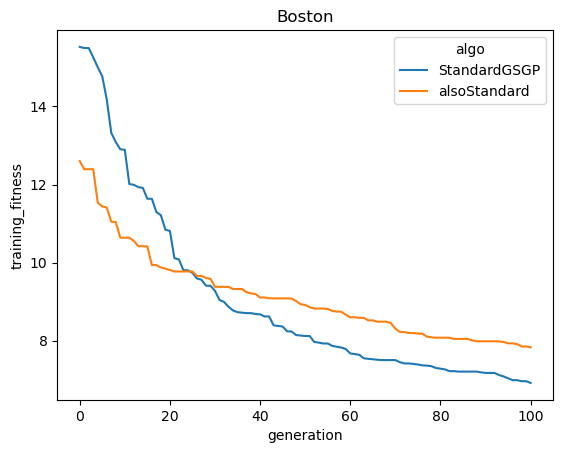

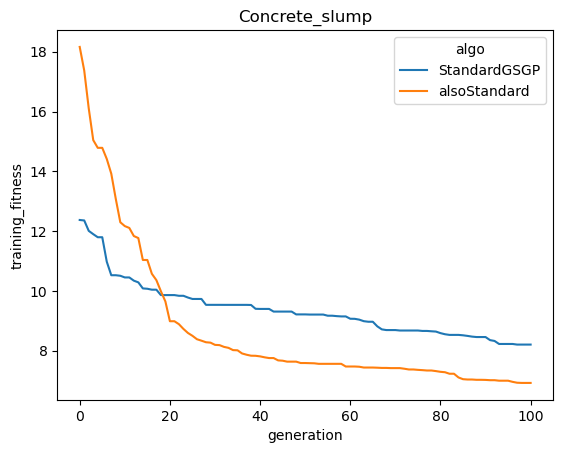

In [44]:
show_results(x_var = "generation", y_var="training_fitness", experiment_id=-1, logger_name="logger_checking.csv",
             log_level=2, dataset=None)